# Prosper Loan Dataset Exploartion
## by Alaa' Nairat

## Investigation Overview

In this investigation, I aimed to explore the features of the Prosper Loan Dataset that might influence loan status. The primary focus was on the following attributes:

- `LoanOriginalAmount`
- `ListingCategory (numeric)`
- `ProsperRating (Alpha)`
- `ListingCreationDate`
- `BorrowerRate`
- `IsBorrowerHomeowner`
- `Occupation`
- `StatedMonthlyIncome`
- `EmploymentStatus`
- `DelinquenciesLast7Years`




## Dataset Overview and Executive Summary

The initial data exploration uncovered significant patterns, such as the dominance of "Current" and "Completed" loan statuses, which constitute the majority of the data. Additionally, a noticeable increase in loan amounts from 2009 to 2015 was observed.

However, inconsistencies, particularly in employment status and ProsperRating categories, as well as axis label mismatches in visualizations, require further investigation. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('df_loan.csv')


## What is the most frequent Loan status in the dataset?


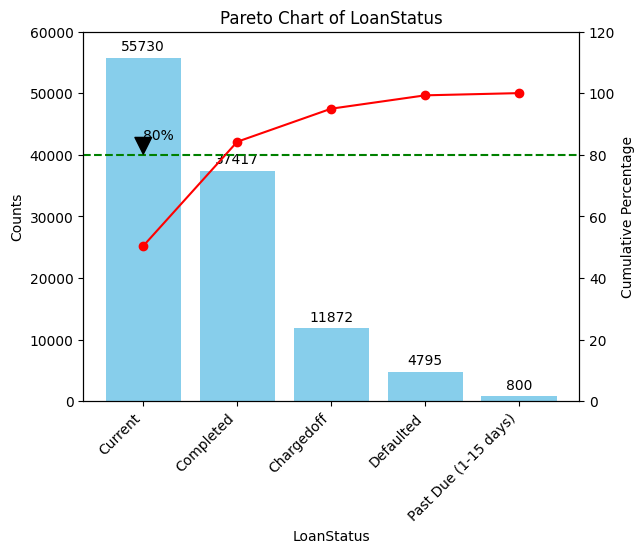

In [8]:
def pareto(df, attribute_name, ylim, pylim=100):
    """
    Draws a Pareto chart for the specified attribute in the DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    attribute_name (str): The name of the attribute/column to plot.
    
    Returns:
    None
    """
    # Count the occurrences of each value in the specified attribute
    attribute_counts = df[attribute_name].value_counts().nlargest(5)
    sorted_counts = attribute_counts.sort_values(ascending=False)
    
    # Calculate cumulative percentage
    cumulative_percentage = sorted_counts.cumsum() / sorted_counts.sum() * 100
    
    # Find the index where cumulative percentage is closest to 80%
    threshold_80_index = cumulative_percentage[cumulative_percentage <= 80].index[-1]
    
    # Create a figure and axis
    fig, ax1 = plt.subplots()
    
    # Plot the bar chart
    bars = ax1.bar(sorted_counts.index, sorted_counts.values, color='skyblue')
    
    # Add labels to the bars
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords='offset points',
                     ha='center', va='bottom')
    
    # Set labels and title for bar chart
    ax1.set_xlabel(attribute_name)
    ax1.set_ylabel('Counts')
    ax1.set_ylim(0, ylim)  # Set the y-axis limit to 60000
    ax1.set_title(f'Pareto Chart of {attribute_name}')
    
    # Rotate x-axis labels
    ax1.set_xticklabels(sorted_counts.index, rotation=45, ha='right')
    
    # Create a second y-axis for the cumulative percentage line chart
    ax2 = ax1.twinx()
    ax2.plot(sorted_counts.index, cumulative_percentage, color='red', marker='o')
    ax2.set_ylabel('Cumulative Percentage')
    ax2.set_ylim(0, pylim)  # Ensure the cumulative percentage is between 0 and 100
    
    # Draw a horizontal line at the 80% threshold on the cumulative percentage axis
    ax2.axhline(y=80, color='green', linestyle='--')
    ax2.annotate('80%', xy=(sorted_counts.index[0], 80), xytext=(sorted_counts.index[0], 85),
                 arrowprops=dict(facecolor='black', shrink=0.05), 
                 ha='left')
    
    # Show the plot
    plt.show()

# Call the pareto function
# Get the maximum count of loan statuses
max_loan_status = df_loan['LoanStatus'].value_counts().max()

# Custom rounding function to round up to the nearest 10,000
def round_up_to_nearest_ten_thousand(value):
    return math.ceil(value / 10000) * 10000

max_loan_status_ceil = round_up_to_nearest_ten_thousand(max_loan_status)
pareto(df_loan, 'LoanStatus', max_loan_status_ceil, 120)

The Pareto chart reveals that "Current" loan status is the most frequent, constituting approximately 60% of the total count. The 80/20 rule is applicable, with the top two categories, "Current" and "Completed," accounting for the majority of observations. Focusing efforts on these categories is likely to yield the most significant results.

## What is the most frequent ProsperRating (Alpha) in the dataset?

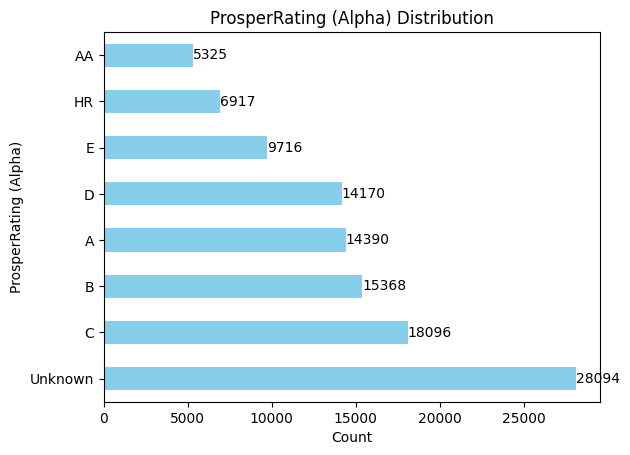

In [3]:
def plot_bar(df, column_name):
    """
    Plots a horizontal bar chart of the value counts for a specified column.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column_name: str, the name of the column to plot.
    """
    # Count the occurrences of each value in the specified column
    value_counts = df[column_name].value_counts()

    # Plot the horizontal bar plot
    ax = value_counts.plot(kind='barh', color='skyblue')

    # Add labels to each bar
    for index, value in enumerate(value_counts):
        ax.text(value, index, str(value), va='center')

    # Set labels and title
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.title(f'{column_name} Distribution')

    # Show the plot
    plt.show()
plot_bar(df_loan, 'ProsperRating (Alpha)')

Based on the provided bar chart, "Unknown" is the most frequent ProsperRating (Alpha) in the dataset, with a count of approximately 28,094 occurrences. This is significantly higher than any other ProsperRating category.

## What is the distribution of Loan Original Amount values in the dataset?



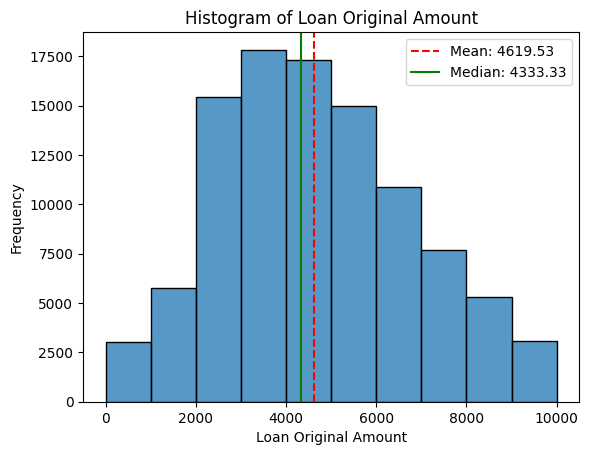

In [11]:
def plot_loan_amount_histogram(df, column, xlabel, ylabel, title, bin_step=0.25, outlier_threshold=None):
    """
    Plots a histogram for the specified column in the given DataFrame using Seaborn,
    and adds vertical lines for the mean and median.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    column (str): The name of the column to plot the histogram for.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title of the plot.
    bin_step (float): The step size for the bins in the histogram.
    outlier_threshold (float): The threshold above which values are considered outliers and removed.

    Returns:
    None
    """
    # Remove outliers if the threshold is specified
    if outlier_threshold is not None:
        df = df[df[column] < outlier_threshold]
    
    # Calculate mean and median
    mean_value = df[column].mean()
    median_value = df[column].median()
    
    # Create bins with the specified step size
    bins = np.arange(0, df[column].max() + bin_step, bin_step)
    
    # Plot histogram using Seaborn
    sns.histplot(df[column], bins=bins, kde=False)
    
    # Add mean and median lines
    plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    
    # Show the plot
    plt.show()




plot_loan_amount_histogram(
    df_loan, 
    'LoanOriginalAmount', 
    'Loan Original Amount', 
    'Frequency', 
    'Histogram of Loan Original Amount',
    bin_step=1000,  # Adjust bin step size as needed
    outlier_threshold=10000  # Remove values above this threshold
)


The histogram shows a clear preference for smaller loans, with two main groups around 3,000 and 5,000. Removing outliers improved data accuracy, confirming the focus on lower-value loans. This information is crucial for targeted marketing and risk management strategies.

## How has the average loan amount changed over the years, and are there any noticeable trends or fluctuations in the average loan amount over time?

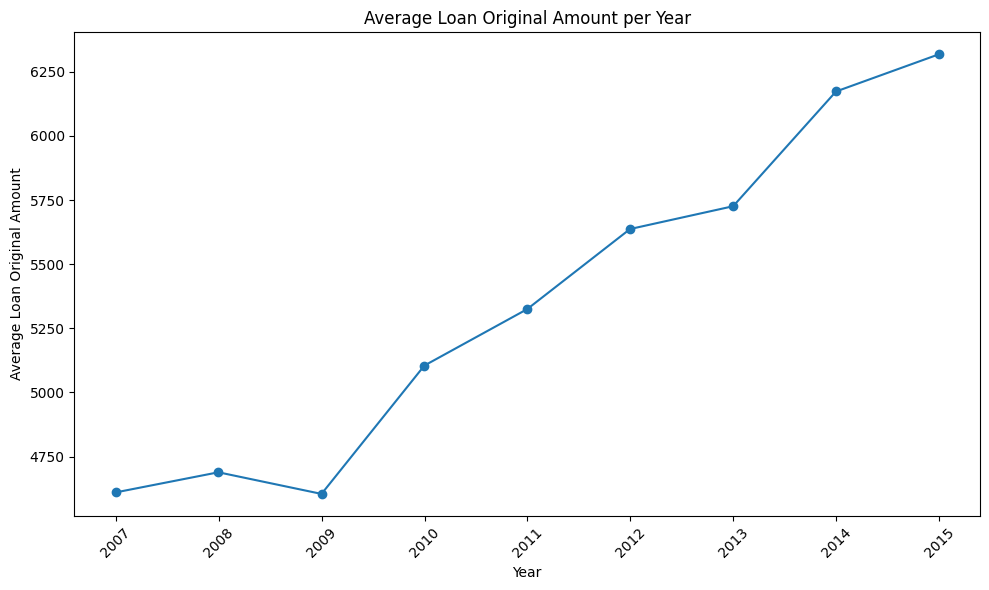

In [16]:
# Create a new DataFrame with 'ListingCreationDate' as index and 'LoanOriginalAmount' as column
df_LoanOriginalAmount = df_loan.set_index('ListingCreationDate')['LoanOriginalAmount']

# Convert the Series to a DataFrame (if needed)
df_LoanOriginalAmount = df_LoanOriginalAmount.to_frame()

# Ensure the 'ListingCreationDate' is in datetime format
df_LoanOriginalAmount.index = pd.to_datetime(df_LoanOriginalAmount.index)



# Resample the data to yearly frequency and calculate the average LoanOriginalAmount
df_yearly_avg = df_LoanOriginalAmount.resample('Y').mean()
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_yearly_avg.index, df_yearly_avg['LoanOriginalAmount'], marker='o', linestyle='-')
plt.title('Average Loan Original Amount per Year')
plt.xlabel('Year')
plt.ylabel('Average Loan Original Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

The line plot chart illustrates a significant increase in the average loan amount, starting from a value in 2009 and climbing steadily to reach 6,250 by 2015.

## How does the borrower rate vary across different loan statuses?

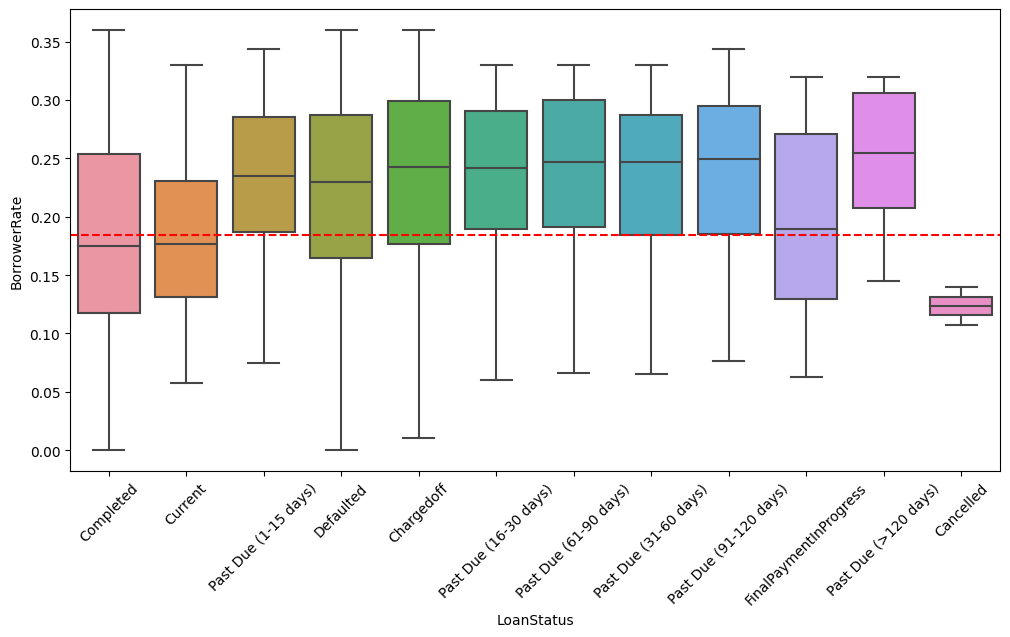

In [18]:
#Set the figure size
plt.figure(figsize=(12, 6))
# Get unique values from 'LoanStatus'
unique_statuses = df_loan['LoanStatus'].unique()

# Create the boxplot
sns.boxplot(data=df_loan, x='LoanStatus', y='BorrowerRate', order=unique_statuses)
# Rotate the x-axis labels
# Calculate the median BorrowerRate
median_rate = df_loan['BorrowerRate'].median()

# Add a vertical line at the median BorrowerRate
plt.axhline(y=median_rate, color='r', linestyle='--', label=f'Median Rate: {median_rate:.2f}')

plt.xticks(rotation=45)

# Display the plot
plt.show()

Based on the boxplot, the borrower rate appears to be highest for borrowers who have Past Due over 120 days  and around the same median range for Past Due category regarding the days for. While the category Cancelled has the lowes median compared all theLoan status categories, meaning that it has the lowest borrower rate and smallest range meaning that all the values are close to each other. However, there is also a significant amount of overlap between the different loan statuses, suggesting that there is a fair amount of variation in borrower rates within each group. for example,  Completed and Defaulted have the largest range and hence variation within the same group.

-   **General Trend:** There seems to be a general trend of increasing borrower rates as the loan status progresses from "Cancelled" to "Past Due" categories.
-   **Outliers:** Several loan statuses exhibit outliers, particularly on the higher end of the borrower rate spectrum. This suggests that there are some loans with exceptionally high interest rates within certain loan status categories.
-   **Variation:** The box plots for different loan statuses vary in terms of their spread and median values. For instance, "Cancelled" loans tend to have a lower median borrower rate and a smaller range compared to statuses like "Past Due (91-120 days)" or "Past Due (>120 days)".

In [ ]:
!jupyter nbconvert Part_II_explanatory_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_explanatory_template.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 508966 bytes to Part_II_explanatory_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_explanatory_template.slides.html
Use Control-C to stop this server
[NbConvertApp] WARNING | No web browser found: could not locate runnable browser.


### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
